Data Analyzing

- How many rows and columns?
- What is the correlation between the variables and the price? (Why might that be?)
- How are variables correlated to each other? (Why?)
- Which variables have the greatest influence on the price?
- Which variables have the least influence on the price?
- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

Import libraries and establish df

In [6]:
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_json('final_dataset.json')
df = df.replace(r'\s+', '', regex=True)
#df_cleaned = df.dropna()

#df_cleaned

Display variables to compare with price

In [7]:
df.columns

Index(['Url', 'BathroomCount', 'BedroomCount', 'ConstructionYear', 'Country',
       'District', 'Fireplace', 'FloodingZone', 'Furnished', 'Garden',
       'GardenArea', 'Kitchen', 'LivingArea', 'Locality', 'MonthlyCharges',
       'NumberOfFacades', 'PEB', 'PostalCode', 'Price', 'PropertyId',
       'Province', 'Region', 'RoomCount', 'ShowerCount', 'StateOfBuilding',
       'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool', 'Terrace',
       'ToiletCount', 'TypeOfProperty', 'TypeOfSale'],
      dtype='object')

Correlation between 'Openfire' and 'Price'

In [14]:
print(df['Fireplace'].value_counts())
print(df['Fireplace'].groupby(df['Price']).median())
print(df.info())


Fireplace
1.0    4123
Name: count, dtype: int64
Price
1          NaN
25         NaN
30         NaN
34         NaN
36         NaN
            ..
12500000   NaN
14250000   NaN
15000000   NaN
22500000   NaN
35000000   NaN
Name: Fireplace, Length: 10501, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 118714 entries, 2 to 181792
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea         22503 non-null  

In [ ]:
#no open fire move to the next variable

Correlation 'Furnished' with 'Price'

In [15]:
print(df['Furnished'].value_counts())
print(df['Furnished'].groupby(df['Price']).median())
print(df.info())


Furnished
0.0    28201
1.0     2124
Name: count, dtype: int64
Price
1           0.0
25          NaN
30          NaN
34          NaN
36          NaN
           ... 
12500000    NaN
14250000    NaN
15000000    0.0
22500000    NaN
35000000    NaN
Name: Furnished, Length: 10501, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 118714 entries, 2 to 181792
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea

0.027248964711879035


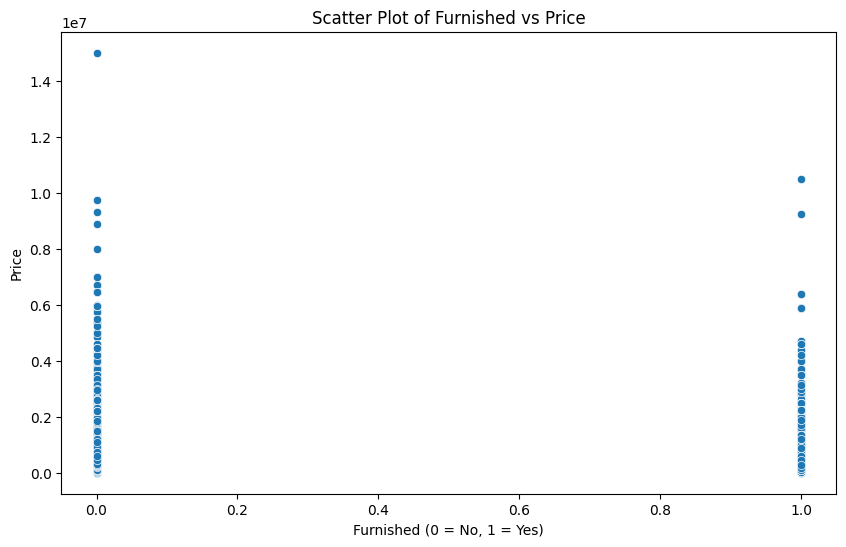

In [16]:
coeff = df.Furnished.corr(df['Price'])

print(coeff)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Furnished', y='Price', data=df)
plt.title('Scatter Plot of Furnished vs Price')
plt.xlabel('Furnished (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()


Correlation 'Terrace' and 'Price'

In [17]:
print(df['Terrace'].value_counts())
print(df['Terrace'].groupby(df['Price']).median())
print(df.info())

Terrace
1.0    68344
Name: count, dtype: int64
Price
1           1.0
25          1.0
30          1.0
34          NaN
36          NaN
           ... 
12500000    1.0
14250000    1.0
15000000    1.0
22500000    NaN
35000000    NaN
Name: Terrace, Length: 10501, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 118714 entries, 2 to 181792
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea         22503 no

In [18]:
coeff = df.Terrace.corr(['Price'])

print(coeff)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Furnished', y='Price', data=df)
plt.title('Scatter Plot of Furnished vs Price')
plt.xlabel('Furnished (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

TypeError: unsupported type: <class 'list'>

Correlation 'Garden' and 'Price'